
This script run the EcoMotionZip on videos and records the data

### Import test video database from the directory and get video characteristics

In [14]:
import pandas as pd
import os
from moviepy.editor import VideoFileClip

rename_info = pd.read_csv('./testing/test_video_renames.csv')

def get_processing_time(log_file_path):
    if os.path.exists(log_file_path):
        with open(log_file_path, "r") as log_file:
            lines = log_file.readlines()
            last_line = lines[-1].strip()
            # print(last_line)
            if last_line.endswith("seconds."):
                processing_time = last_line.split()[-2]
            else:
                processing_time = None
    else:
        processing_time = None

    return processing_time
    

In [15]:

def get_video_info(directory):
    video_info = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
                file_path = os.path.join(root, file)
                video = VideoFileClip(file_path)
                duration = video.duration
                fps = video.fps
                resolution = video.size
                file_size = os.path.getsize(file_path)
                frame_count = video.reader.nframes
                video_info.append({
                    "Video Name": file, 
                    "file_size": file_size,
                    "duration": duration,
                    "frame_count": frame_count,
                    "fps": fps,
                    "resolution": resolution
                    
                })
    return pd.DataFrame(video_info)

directory = "./testing/test_videos"
video_data = get_video_info(directory)
video_data['file_size'] = video_data['file_size'] / 1048576

# for index, row in rename_info.iterrows():
#     old_video_name = row['Old_Video_Name']
#     new_video_name = row['New_Video_Name']
#     video_data.loc[video_data['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
video_data.insert(1, 'Dataset', video_data['Video Name'].str.split('_').str[0])

video_data

,Video Name,Dataset,file_size,duration,frame_count,fps,resolution
0,cam_7_S_video_20210310_142405.h264.avi,cam,1259.698936,600.13,18004,30.0,"[1920, 1080]"
1,cam_4_N_video_20210317_120802.h264.avi,cam,942.189533,598.37,17952,30.0,"[1920, 1080]"
2,cam_2_S_video_20210308_112402.h264.avi,cam,1236.242653,600.13,18004,30.0,"[1920, 1080]"
3,cam_4_N_video_20210317_114802.h264.avi,cam,977.497154,600.13,18004,30.0,"[1920, 1080]"
4,cam_4_N_video_20210309_132604.h264.avi,cam,1024.718670,600.07,18003,30.0,"[1920, 1080]"
5,cam_3_N_video_20210317_142705.h264.avi,cam,899.098175,598.63,17959,30.0,"[1920, 1080]"
6,cam_8_N_video_20210310_133844.h264.avi,cam,966.772497,600.10,18004,30.0,"[1920, 1080]"
7,cam_1_N_video_20210315_132804.h264.avi,cam,1205.925222,598.90,17968,30.0,"[1920, 1080]"
8,cam_1_S_video_20210317_123004.h264.avi,cam,1258.126583,600.40,18013,30.0,"[1920, 1080]"
9,cam_3_S_video_20210312_123203.h264.avi,cam,1124.785391,600.00,18001,30.0,"[1920, 1080]"


In [16]:

video_data_summary = video_data.groupby(['Dataset']).sum()
video_data_summary = video_data_summary.reset_index()
video_data_summary = video_data_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
video_data_summary['No. Of Videos'] = video_data.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
video_data_summary = video_data_summary.drop(columns=['Video Name'])

# Rename the columns in the dataframe.
video_data_summary = video_data_summary.rename(columns={
    "file_size": "File Size (MB)",
    "duration": "Duration (s)",
    "frame_count": "Frame Count",
    "fps": "FPS",
    "resolution": "Video Resolution"
})

# Change the video resolution column to [1920, 1080] for all rows.
video_data_summary['Video Resolution'] = video_data_summary['Video Resolution'].apply(lambda x: [1920, 1080])

#Set the  video resolution of PIC dataset to [1296, 972].
# video_data_summary.loc[video_data_summary['Dataset'] == 'PICT', 'Video Resolution'] = [1296, 972]

# Move the No. Of Videos column after the Dataset column.
video_data_summary = video_data_summary[['Dataset', 'No. Of Videos', 'File Size (MB)', 'Duration (s)', 'Frame Count', 'FPS', 'Video Resolution']]

video_data_summary

,Dataset,No. Of Videos,File Size (MB),Duration (s),Frame Count,FPS,Video Resolution
0,00020.avi,1,360.32,755.48,18888,25.0,"[1920, 1080]"
1,00024.avi,1,447.69,755.48,18888,25.0,"[1920, 1080]"
2,00026.avi,1,495.19,755.48,18888,25.0,"[1920, 1080]"
3,08040046.avi,1,109.14,60.47,1815,30.0,"[1920, 1080]"
4,08140020.avi,1,109.17,60.47,1815,30.0,"[1920, 1080]"
5,08210024.avi,1,109.17,60.47,1815,30.0,"[1920, 1080]"
6,Sup-Mat-1-reduced-video.mp4,1,23.59,32.90,790,24.0,"[1920, 1080]"
7,bee,7,442.45,371.08,22269,420.0,"[1920, 1080]"
8,cam,10,10895.05,5996.86,179912,300.0,"[1920, 1080]"
9,mee313618-sup-0002-videos1.mp4,1,22.00,93.07,1397,15.0,"[1920, 1080]"


In [17]:
# Convert the dataframe to a latex table.
print(video_data_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|'))

\begin{tabular}{|c|c|c|c|c|c|c|}
\toprule
Dataset & No. Of Videos & File Size (MB) & Duration (s) & Frame Count & FPS & Video Resolution \\
\midrule
00020.avi & 1 & 360.320000 & 755.480000 & 18888 & 25.000000 & [1920, 1080] \\
00024.avi & 1 & 447.690000 & 755.480000 & 18888 & 25.000000 & [1920, 1080] \\
00026.avi & 1 & 495.190000 & 755.480000 & 18888 & 25.000000 & [1920, 1080] \\
08040046.avi & 1 & 109.140000 & 60.470000 & 1815 & 30.000000 & [1920, 1080] \\
08140020.avi & 1 & 109.170000 & 60.470000 & 1815 & 30.000000 & [1920, 1080] \\
08210024.avi & 1 & 109.170000 & 60.470000 & 1815 & 30.000000 & [1920, 1080] \\
Sup-Mat-1-reduced-video.mp4 & 1 & 23.590000 & 32.900000 & 790 & 24.000000 & [1920, 1080] \\
bee & 7 & 442.450000 & 371.080000 & 22269 & 420.000000 & [1920, 1080] \\
cam & 10 & 10895.050000 & 5996.860000 & 179912 & 300.000000 & [1920, 1080] \\
mee313618-sup-0002-videos1.mp4 & 1 & 22.000000 & 93.070000 & 1397 & 15.000000 & [1920, 1080] \\
mee313618-sup-0003-videos2.mp4 & 1 & 28.1

### Import results of Raspberry Pi 5 tests

In [18]:
directory = "./testing/RPi5/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_RPi5": file,
                "File_Size_(MB)_RPi5": file_size+csv_filesize,
                "Duration_RPi5": duration,
                "Frame_Count_RPi5": frame_count,
                "FPS_RPi5": fps,
                "Proc_Time_RPi5_R1": float(processing_time_1),
                "Proc_Time_RPi5_R2": float(processing_time_2),
                "Proc_Time_RPi5_R3": float(processing_time_3)
            })

RPi5_results = pd.DataFrame(video_info)

RPi5_results['Processing_Time_RPi5'] = round(RPi5_results[['Proc_Time_RPi5_R1', 'Proc_Time_RPi5_R2', 'Proc_Time_RPi5_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
RPi5_results['Processing_Time_RPi5_SD'] = round(RPi5_results[['Proc_Time_RPi5_R1', 'Proc_Time_RPi5_R2', 'Proc_Time_RPi5_R3']].std(axis=1),3)

RPi5_results.head()

,Video_Name_RPi5,File_Size_(MB)_RPi5,Duration_RPi5,Frame_Count_RPi5,FPS_RPi5,Proc_Time_RPi5_R1,Proc_Time_RPi5_R2,Proc_Time_RPi5_R3,Processing_Time_RPi5,Processing_Time_RPi5_SD
0,08040046.avi,40.196471,59.33,1780,30.0,124.84,124.79,124.26,124.63,0.321
1,bee_test_1.avi,3.568596,13.38,803,60.0,67.81,66.63,67.65,67.36,0.640
2,mee313618-sup-0002-videos1.avi,3.958268,69.07,1037,15.0,42.72,42.09,42.11,42.31,0.358
3,cam_2_S_video_20210308_112402.h264.avi,5.523088,15.83,475,30.0,174.60,183.63,181.09,179.77,4.657
4,bee_test_6.avi,8.447001,32.43,1946,60.0,113.70,114.21,114.71,114.21,0.505


### Import results of Raspberry Pi 4 tests

In [19]:
directory = "./testing/RPi4/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_RPi4": file,
                "File_Size_(MB)_RPi4": file_size+csv_filesize,
                "Duration_RPi4": duration,
                "Frame_Count_RPi4": frame_count,
                "FPS_RPi4": fps,
                "Proc_Time_RPi4_R1": float(processing_time_1),
                "Proc_Time_RPi4_R2": float(processing_time_2),
                "Proc_Time_RPi4_R3": float(processing_time_3)
            })

RPi4_results = pd.DataFrame(video_info)

RPi4_results['Processing_Time_RPi4'] = round(RPi4_results[['Proc_Time_RPi4_R1', 'Proc_Time_RPi4_R2', 'Proc_Time_RPi4_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
RPi4_results['Processing_Time_RPi4_SD'] = round(RPi4_results[['Proc_Time_RPi4_R1', 'Proc_Time_RPi4_R2', 'Proc_Time_RPi4_R3']].std(axis=1),3)

RPi4_results.head()

,Video_Name_RPi4,File_Size_(MB)_RPi4,Duration_RPi4,Frame_Count_RPi4,FPS_RPi4,Proc_Time_RPi4_R1,Proc_Time_RPi4_R2,Proc_Time_RPi4_R3,Processing_Time_RPi4,Processing_Time_RPi4_SD
0,08040046.avi,40.196471,59.33,1780,30.0,234.70,242.20,244.10,240.33,4.970
1,bee_test_1.avi,3.568596,13.38,803,60.0,107.79,107.25,107.79,107.61,0.312
2,mee313618-sup-0002-videos1.avi,3.958268,69.07,1037,15.0,65.44,65.16,65.17,65.26,0.159
3,cam_2_S_video_20210308_112402.h264.avi,5.523088,15.83,475,30.0,278.31,288.30,285.73,284.11,5.188
4,bee_test_6.avi,8.447001,32.43,1946,60.0,186.95,188.89,186.36,187.40,1.324


In [7]:
directory = "./testing/JetsonNano/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_JetsonNano": file,
                "File_Size_(MB)_JetsonNano": file_size+csv_filesize,
                "Duration_JetsonNano": duration,
                "Frame_Count_JetsonNano": frame_count,
                "FPS_JetsonNano": fps,
                "Proc_Time_JetsonNano_R1": float(processing_time_1),
                "Proc_Time_JetsonNano_R2": float(processing_time_2),
                "Proc_Time_JetsonNano_R3": float(processing_time_3)
            })

JetsonNano_results = pd.DataFrame(video_info)

JetsonNano_results['Processing_Time_JetsonNano'] = round(JetsonNano_results[['Proc_Time_JetsonNano_R1', 'Proc_Time_JetsonNano_R2', 'Proc_Time_JetsonNano_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
JetsonNano_results['Processing_Time_JetsonNano_SD'] = round(JetsonNano_results[['Proc_Time_JetsonNano_R1', 'Proc_Time_JetsonNano_R2', 'Proc_Time_JetsonNano_R3']].std(axis=1),3)

JetsonNano_results.head()

,Video_Name_JetsonNano,File_Size_(MB)_JetsonNano,Duration_JetsonNano,Frame_Count_JetsonNano,FPS_JetsonNano,Proc_Time_JetsonNano_R1,Proc_Time_JetsonNano_R2,Proc_Time_JetsonNano_R3,Processing_Time_JetsonNano,Processing_Time_JetsonNano_SD
0,08040046.avi,181.477080,59.33,1780,30.0,174.10,149.21,147.19,156.83,14.987
1,bee_test_1.avi,17.231031,13.38,803,60.0,64.88,64.81,64.81,64.83,0.040
2,mee313618-sup-0002-videos1.avi,12.727021,69.07,1037,15.0,36.11,35.63,36.13,35.96,0.283
3,cam_2_S_video_20210308_112402.h264.avi,5.522078,15.83,475,30.0,235.39,236.52,233.95,235.29,1.288
4,bee_test_6.avi,47.275686,32.43,1946,60.0,109.37,109.84,109.85,109.69,0.274


### Result analysis

In [20]:
# Merge the three dataframes based on the video name. Ignore the extension in the video name. Sort the dataframe by the video name.
results = pd.merge(video_data, RPi5_results, left_on=video_data['Video Name'].str.split('.').str[0], right_on=RPi5_results['Video_Name_RPi5'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])
results = pd.merge(results, RPi4_results, left_on=results['Video Name'].str.split('.').str[0], right_on=RPi4_results['Video_Name_RPi4'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])

results = pd.merge(results, JetsonNano_results, left_on=video_data['Video Name'].str.split('.').str[0], right_on=JetsonNano_results['Video_Name_JetsonNano'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])

results = results.sort_values(by="Video Name")


results.head()

,Video Name,Dataset,file_size,duration,frame_count,fps,resolution,Video_Name_RPi5,File_Size_(MB)_RPi5,Duration_RPi5,...,Video_Name_JetsonNano,File_Size_(MB)_JetsonNano,Duration_JetsonNano,Frame_Count_JetsonNano,FPS_JetsonNano,Proc_Time_JetsonNano_R1,Proc_Time_JetsonNano_R2,Proc_Time_JetsonNano_R3,Processing_Time_JetsonNano,Processing_Time_JetsonNano_SD
12,00020.avi,00020.avi,360.324339,755.48,18888,25.0,"[1920, 1080]",00020.avi,7.065228,63.44,...,00020.avi,25.079231,63.44,1587,25.0,324.22,322.22,324.19,323.54,1.146
11,00024.avi,00024.avi,447.693756,755.48,18888,25.0,"[1920, 1080]",00024.avi,26.584202,318.36,...,00024.avi,115.323465,318.36,7960,25.0,474.93,471.01,472.51,472.82,1.978
10,00026.avi,00026.avi,495.194162,755.48,18888,25.0,"[1920, 1080]",00026.avi,18.682243,184.92,...,00026.avi,77.130566,184.92,4624,25.0,366.39,376.28,376.98,373.22,5.922
25,08040046.avi,08040046.avi,109.142805,60.47,1815,30.0,"[1920, 1080]",08040046.avi,40.196471,59.33,...,08040046.avi,181.477080,59.33,1780,30.0,174.10,149.21,147.19,156.83,14.987
24,08140020.avi,08140020.avi,109.171209,60.47,1815,30.0,"[1920, 1080]",08140020.avi,3.022605,22.37,...,08140020.avi,12.767562,22.37,672,30.0,48.63,49.08,49.53,49.08,0.450


In [21]:
results.columns

Index(['Video Name', 'Dataset', 'file_size', 'duration', 'frame_count', 'fps',
       'resolution', 'Video_Name_RPi5', 'File_Size_(MB)_RPi5', 'Duration_RPi5',
       'Frame_Count_RPi5', 'FPS_RPi5', 'Proc_Time_RPi5_R1',
       'Proc_Time_RPi5_R2', 'Proc_Time_RPi5_R3', 'Processing_Time_RPi5',
       'Processing_Time_RPi5_SD', 'Video_Name_RPi4', 'File_Size_(MB)_RPi4',
       'Duration_RPi4', 'Frame_Count_RPi4', 'FPS_RPi4', 'Proc_Time_RPi4_R1',
       'Proc_Time_RPi4_R2', 'Proc_Time_RPi4_R3', 'Processing_Time_RPi4',
       'Processing_Time_RPi4_SD', 'Video_Name_JetsonNano',
       'File_Size_(MB)_JetsonNano', 'Duration_JetsonNano',
       'Frame_Count_JetsonNano', 'FPS_JetsonNano', 'Proc_Time_JetsonNano_R1',
       'Proc_Time_JetsonNano_R2', 'Proc_Time_JetsonNano_R3',
       'Processing_Time_JetsonNano', 'Processing_Time_JetsonNano_SD'],
      dtype='object')

### Anlysis of Video Compression

In [9]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the file size, the duration, the frame count, File size RPi5, Duration_RPi5 and number of frames RPi5 .
compression = results[['Video Name', 'file_size', 'duration', 'frame_count', 'File_Size_(MB)_RPi5', 'Duration_RPi5', 'Frame_Count_RPi5']]

# Rename the columns to make them more readable.
compression.columns = ['Video Name', 'Raw File Size (MB)', 'Raw Duration (s)', 'Raw Frame Count', 'Processed File Size (MB)', 'Processed Duration (s)', 'Processed Frame Count']

# Calculate the percentage reduction in File Size and Frame Count.
compression['File Size Reduction (%)'] = ((compression['Raw File Size (MB)'] - compression['Processed File Size (MB)']) / compression['Raw File Size (MB)']) * 100
compression['Frame Count Reduction (%)'] = ((compression['Raw Frame Count'] - compression['Processed Frame Count']) / compression['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
results_display = compression.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    compression.loc[compression['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
compression.insert(1, 'Dataset', compression['Video Name'].str.split('_').str[0])

# Display the dataframe.
compression


,Video Name,Dataset,Raw File Size (MB),Raw Duration (s),Raw Frame Count,Processed File Size (MB),Processed Duration (s),Processed Frame Count,File Size Reduction (%),Frame Count Reduction (%)
12,NestMonitoring_V1,NestMonitoring,360.324339,755.48,18888,7.065228,63.44,1587,98.039203,91.597840
11,NestMonitoring_V2,NestMonitoring,447.693756,755.48,18888,26.584202,318.36,7960,94.061967,57.856840
10,NestMonitoring_V3,NestMonitoring,495.194162,755.48,18888,18.682243,184.92,4624,96.227289,75.518848
25,Naqvi2022_V1,Naqvi2022,109.142805,60.47,1815,40.196471,59.33,1780,63.170755,1.928375
24,Naqvi2022_V2,Naqvi2022,109.171209,60.47,1815,3.022605,22.37,672,97.231317,62.975207
26,Naqvi2022_V3,Naqvi2022,109.168022,60.47,1815,27.149517,56.47,1695,75.130522,6.611570
16,vanderVoort2022_V1,vanderVoort2022,23.593646,32.90,790,2.448359,32.13,772,89.622801,2.278481
19,Ratnayake2021_V1,Ratnayake2021,66.200603,59.01,3541,3.568596,13.38,803,94.609421,77.322790
18,Ratnayake2021_V2,Ratnayake2021,56.854961,49.00,2941,4.514054,18.47,1109,92.060404,62.291738
17,Ratnayake2021_V3,Ratnayake2021,70.104886,60.01,3601,5.818557,27.62,1658,91.700212,53.957234


In [10]:
# Create a new dataframe name named "compression_summary" from the "compression" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw file size, processed file size, raw duration, processed duration, raw frame count and processed frame count.
compression_summary = compression.groupby(['Dataset']).sum()
compression_summary = compression_summary.reset_index()
compression_summary = compression_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
compression_summary['No. Of Videos'] = compression.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
compression_summary = compression_summary.drop(columns=['Video Name'])

# Recalculate the percentage reduction in File Size and Frame Count.
compression_summary['File Size Reduction (%)'] = ((compression_summary['Raw File Size (MB)'] - compression_summary['Processed File Size (MB)']) / compression_summary['Raw File Size (MB)']) * 100
compression_summary['Frame Count Reduction (%)'] = ((compression_summary['Raw Frame Count'] - compression_summary['Processed Frame Count']) / compression_summary['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
compression_summary = compression_summary.round(2)

# Move the No. Of Videos column after the Dataset column.
compression_summary = compression_summary[['Dataset', 'No. Of Videos', 'Raw Frame Count', 'Raw File Size (MB)', 'Processed Frame Count', 'Processed File Size (MB)', 'Frame Count Reduction (%)', 'File Size Reduction (%)', 
                                           'Raw Duration (s)', 'Processed Duration (s)']]

compression_summary

,Dataset,No. Of Videos,Raw Frame Count,Raw File Size (MB),Processed Frame Count,Processed File Size (MB),Frame Count Reduction (%),File Size Reduction (%),Raw Duration (s),Processed Duration (s)
0,Naqvi2022,3,5445,327.48,4147,70.37,23.84,78.51,181.41,138.17
1,NestMonitoring,3,56664,1303.21,14171,52.33,74.99,95.98,2266.44,566.72
2,PICT,3,5471,73.09,3843,20.84,29.76,71.49,307.34,215.17
3,Ratnayake2021,7,22269,442.45,9912,39.29,55.49,91.12,371.08,165.13
4,Ratnayake2022,10,179912,10895.05,12093,260.23,93.28,97.61,5996.86,402.99
5,vanderVoort2022,1,790,23.59,772,2.45,2.28,89.61,32.90,32.13


In [11]:
# Insert a new row in the bottom of the dataframe with the total values for each column.
compression_summary.loc['Total'] = compression_summary.sum()

compression_summary


# Convert the dataframe to a latex table.
# print(compression_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|c|c|c|'))


,Dataset,No. Of Videos,Raw Frame Count,Raw File Size (MB),Processed Frame Count,Processed File Size (MB),Frame Count Reduction (%),File Size Reduction (%),Raw Duration (s),Processed Duration (s)
0,Naqvi2022,3,5445,327.48,4147,70.37,23.84,78.51,181.41,138.17
1,NestMonitoring,3,56664,1303.21,14171,52.33,74.99,95.98,2266.44,566.72
2,PICT,3,5471,73.09,3843,20.84,29.76,71.49,307.34,215.17
3,Ratnayake2021,7,22269,442.45,9912,39.29,55.49,91.12,371.08,165.13
4,Ratnayake2022,10,179912,10895.05,12093,260.23,93.28,97.61,5996.86,402.99
5,vanderVoort2022,1,790,23.59,772,2.45,2.28,89.61,32.90,32.13
Total,Naqvi2022NestMonitoringPICTRatnayake2021Ratnay...,27,270551,13064.87,44938,445.51,279.64,524.32,9156.03,1520.31


In [13]:
# Calaculate the average Frame Size Reduction % and File Size Reduction % and print it.
print(f"Average Frame Size Reduction %: {compression_summary['Frame Count Reduction (%)'].mean()}")
print(f"Average File Size Reduction %: {compression_summary['File Size Reduction (%)'].mean()}")


Average Frame Size Reduction %: 51.860458323846224
Average File Size Reduction %: 88.70272095783517


### Analysis of Processing Times

In [22]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the duration, fps, frame count Processing_Time_RPi5 and Processing_Time_RPi4 .
processing_time = results[['Video Name', 'duration', 'fps', 'frame_count', 'Processing_Time_RPi5', 'Processing_Time_RPi5_SD', 'Processing_Time_RPi4', 'Processing_Time_RPi4_SD', 'Processing_Time_JetsonNano', 'Processing_Time_JetsonNano_SD']]
processing_time.columns = ['Video Name', 'Raw Video Duration (s)', 'FPS', 'Raw Video Frame Count', 'Processing Time RPi5 (s)', 'Processing Time RPi5 -SD (s)', 'Processing Time RPi4 (s)','Processing Time RPi4 -SD (s)',
                            'Processing Time JetsonNano (s)','Processing Time JetsonNano -SD (s)']

# Convert the Processing_Time_RPi5 and Processing_Time_RPi4 columns to float.
processing_time['Processing Time RPi5 (s)'] = processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Time RPi4 (s)'] = processing_time['Processing Time RPi4 (s)'].astype(float)
processing_time['Processing Time RPi5 -SD (s)'] = processing_time['Processing Time RPi5 -SD (s)'].astype(float)
processing_time['Processing Time RPi4 -SD (s)'] = processing_time['Processing Time RPi4 -SD (s)'].astype(float)
processing_time['Processing Time JetsonNano (s)'] = processing_time['Processing Time JetsonNano (s)'].astype(float)
processing_time['Processing Time JetsonNano -SD (s)'] = processing_time['Processing Time JetsonNano -SD (s)'].astype(float)


# Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time['Processing Speed RPi5 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Speed RPi4 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi4 (s)'].astype(float)
processing_time['Processing Speed JetsonNano (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time JetsonNano (s)'].astype(float)

# Round the values in the dataframe to 2 decimal places.
processing_time = processing_time.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    processing_time.loc[processing_time['Video Name'] == old_video_name, 'Video Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
processing_time.insert(1, 'Dataset', processing_time['Video Name'].str.split('_').str[0])

processing_time



,Video Name,Dataset,Raw Video Duration (s),FPS,Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi5 -SD (s),Processing Time RPi4 (s),Processing Time RPi4 -SD (s),Processing Time JetsonNano (s),Processing Time JetsonNano -SD (s),Processing Speed RPi5 (fps),Processing Speed RPi4 (fps),Processing Speed JetsonNano (fps)
12,NestMonitoring_V1,NestMonitoring,755.48,25.0,18888,272.43,2.38,477.89,4.14,323.54,1.15,69.33,39.52,58.38
11,NestMonitoring_V2,NestMonitoring,755.48,25.0,18888,463.79,2.10,751.68,4.87,472.82,1.98,40.73,25.13,39.95
10,NestMonitoring_V3,NestMonitoring,755.48,25.0,18888,369.97,0.47,607.41,6.29,373.22,5.92,51.05,31.10,50.61
25,Naqvi2022_V1,Naqvi2022,60.47,30.0,1815,124.63,0.32,240.33,4.97,156.83,14.99,14.56,7.55,11.57
24,Naqvi2022_V2,Naqvi2022,60.47,30.0,1815,46.07,0.29,76.46,1.01,49.08,0.45,39.40,23.74,36.98
26,Naqvi2022_V3,Naqvi2022,60.47,30.0,1815,98.33,0.10,176.95,0.26,110.53,3.07,18.46,10.26,16.42
16,vanderVoort2022_V1,vanderVoort2022,32.90,24.0,790,35.07,0.01,57.72,0.02,41.66,0.01,22.53,13.69,18.96
19,Ratnayake2021_V1,Ratnayake2021,59.01,60.0,3541,67.36,0.64,107.61,0.31,64.83,0.04,52.57,32.91,54.62
18,Ratnayake2021_V2,Ratnayake2021,49.00,60.0,2941,71.01,0.56,111.77,1.72,64.63,1.74,41.42,26.31,45.51
17,Ratnayake2021_V3,Ratnayake2021,60.01,60.0,3601,95.85,0.29,149.83,0.49,89.20,0.74,37.57,24.03,40.37


In [23]:
# Create a new dataframe name named "processing_time_summary" from the "processing_time" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw video duration, Raw Video Frame Count, processing time RPi5 and processing time RPi4. Average FPS, Processing Speed RPi5 (fps) and Processing Speed RPi4 (fps) will be calculated.

processing_time_summary = processing_time.groupby(['Dataset']).sum()
processing_time_summary = processing_time_summary.reset_index()
processing_time_summary = processing_time_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
processing_time_summary['No. Of Videos'] = processing_time.groupby(['Dataset']).size().values

# Calculate the FPS by averaging total FPS by the number of videos in each dataset.
processing_time_summary['Average FPS'] = processing_time_summary['FPS'] / processing_time_summary['No. Of Videos']
# processing_time_summary['FPS'] = processing_time.groupby(['Dataset']).size().values

# Calculate the mean of Processing Time RPi4 -SD (s) for each dataset and insert it into the dataframe.
processing_time_summary['Processing Time RPi4 - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time RPi4 -SD (s)'].mean().values
processing_time_summary['Processing Time RPi5 - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time RPi5 -SD (s)'].mean().values
processing_time_summary['Processing Time JetsonNano - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time JetsonNano -SD (s)'].mean().values


# Drop the  Video Name column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['Video Name'])

# # Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time_summary['Avg. Processing Speed RPi5 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi5 (s)'].astype(float)
processing_time_summary['Avg. Processing Speed RPi4 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi4 (s)'].astype(float)
processing_time_summary['Avg. Processing Speed JetsonNano (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time JetsonNano (s)'].astype(float)

# # Round the values in the dataframe to 2 decimal places.
processing_time_summary = processing_time_summary.round(2)

# Remove the FPS column from the dataframe. Move the No. Of Videos column and Average FPS column after the Dataset column.
processing_time_summary = processing_time_summary[['Dataset', 'No. Of Videos', 'Average FPS', 'Raw Video Duration (s)', 'Raw Video Frame Count', 'Processing Time RPi5 (s)','Processing Time RPi5 - SD (s)', 'Avg. Processing Speed RPi5 (fps)', 
                                                   'Processing Time RPi4 (s)', 'Processing Time RPi4 - SD (s)' ,'Avg. Processing Speed RPi4 (fps)', 'Processing Time JetsonNano (s)', 'Processing Time JetsonNano - SD (s)' ,'Avg. Processing Speed JetsonNano (fps)']]

# Modify the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns to include the standard deviation.
processing_time_summary['Processing Time RPi5 (s) - SD'] = processing_time_summary['Processing Time RPi5 (s)'].astype(str) + " ± " + processing_time_summary['Processing Time RPi5 - SD (s)'].astype(str)
processing_time_summary['Processing Time RPi4 (s) - SD'] = processing_time_summary['Processing Time RPi4 (s)'].astype(str) + " ± " + processing_time_summary['Processing Time RPi4 - SD (s)'].astype(str)
processing_time_summary['Processing Time JetsonNano (s) - SD'] = processing_time_summary['Processing Time JetsonNano (s)'].astype(str) + " ± " + processing_time_summary['Processing Time JetsonNano - SD (s)'].astype(str)

# Remove the Processing Time RPi5 - SD (s) and Processing Time RPi4 - SD (s) columns from the dataframe.
# processing_time_summary = processing_time_summary.drop(columns=['Processing Time RPi5 - SD (s)', 'Processing Time RPi4 - SD (s)'])


# processing_time_summary
# processing_time_summary = processing_time_summary.sort_values(by='Raw Video Frame Count', ascending=True)
processing_time_summary




,Dataset,No. Of Videos,Average FPS,Raw Video Duration (s),Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi5 - SD (s),Avg. Processing Speed RPi5 (fps),Processing Time RPi4 (s),Processing Time RPi4 - SD (s),Avg. Processing Speed RPi4 (fps),Processing Time JetsonNano (s),Processing Time JetsonNano - SD (s),Avg. Processing Speed JetsonNano (fps),Processing Time RPi5 (s) - SD,Processing Time RPi4 (s) - SD,Processing Time JetsonNano (s) - SD
0,Naqvi2022,3,30.0,181.41,5445,269.03,0.24,20.24,493.74,2.08,11.03,316.44,6.17,17.21,269.03 ± 0.24,493.74 ± 2.08,316.44 ± 6.17
1,NestMonitoring,3,25.0,2266.44,56664,1106.19,1.65,51.22,1836.98,5.10,30.85,1169.58,3.02,48.45,1106.19 ± 1.65,1836.98 ± 5.1,1169.58 ± 3.02
2,PICT,3,18.0,307.34,5471,173.02,0.41,31.62,276.99,0.68,19.75,147.59,0.36,37.07,173.02 ± 0.41,276.99 ± 0.68,147.59 ± 0.36
3,Ratnayake2021,7,60.0,371.08,22269,582.80,0.66,38.21,938.42,1.20,23.73,564.34,0.86,39.46,582.8 ± 0.66,938.42 ± 1.2,564.34 ± 0.86
4,Ratnayake2022,10,30.0,5996.86,179912,1900.70,7.22,94.66,2956.55,6.95,60.85,2446.60,1.73,73.54,1900.7 ± 7.22,2956.55 ± 6.95,2446.6 ± 1.73
5,vanderVoort2022,1,24.0,32.90,790,35.07,0.01,22.53,57.72,0.02,13.69,41.66,0.01,18.96,35.07 ± 0.01,57.72 ± 0.02,41.66 ± 0.01


<Figure size 1000x600 with 0 Axes>

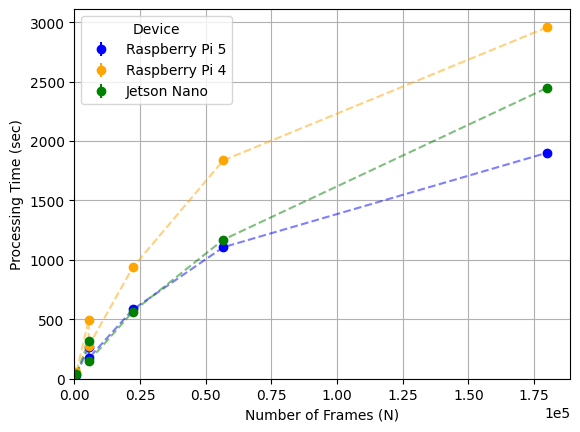

In [24]:
# Plot an errorbar for the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns for each dataset with the standard deviation as the error and Raw Frame Count as the x-axis.
import matplotlib.pyplot as plt
import numpy as np

processing_time_summary_sorted = processing_time_summary.sort_values(by='Raw Video Frame Count', ascending=True)

# Set the seaborn style to vo_8_colorblind
plt.style.use('seaborn-v0_8-colorblind') 

# print(plt.style.available)

# Set the figure size.
plt.figure(figsize=(10, 6))

# Set the x-axis to be the Raw Frame Count column.
x = processing_time_summary_sorted['Raw Video Frame Count']

# Set the y-axis to be the Processing Time RPi5 (s) column.
y = processing_time_summary_sorted['Processing Time RPi5 (s)']

# Set the error to be the Processing Time RPi5 - SD (s) column.
error = processing_time_summary_sorted['Processing Time RPi5 - SD (s)']

fig, ax = plt.subplots()

# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="RPi5", color='blue')
ax.plot(x, y, linestyle='--', alpha=0.5, color='blue')



# Set the y-axis to be the Processing Time RPi4 (s) column.
y = processing_time_summary_sorted['Processing Time RPi4 (s)']

# Set the error to be the Processing Time RPi4 - SD (s) column.

error = processing_time_summary_sorted['Processing Time RPi4 - SD (s)']


# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="RPi4", color='orange')
ax.plot(x, y, linestyle='--', alpha=0.5, color='orange')

# Set the y-axis to be the Processing Time JetsonNano (s) column.
y = processing_time_summary_sorted['Processing Time JetsonNano (s)']

# Set the error to be the Processing Time JetsonNano - SD (s) column.

error = processing_time_summary_sorted['Processing Time JetsonNano - SD (s)']


# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="JetsonNano", color='green')
ax.plot(x, y, linestyle='--', alpha=0.5, color='green')


# Set the x-axis label.
plt.xlabel("Number of Frames (N)")

# Set the y-axis label.

plt.ylabel("Processing Time (sec)")

# Set the title of the plot.
# plt.title("Processing Time vs Raw Frame Count")

# Insert Gridlines.
plt.grid()


# Set the legend. and edit labels to Raspberrry Pi 5 and Raspberry Pi 4.
plt.legend(loc="upper left", title="Device")
plt.gca().get_legend().get_texts()[0].set_text('Raspberry Pi 5')
plt.gca().get_legend().get_texts()[1].set_text('Raspberry Pi 4')
plt.gca().get_legend().get_texts()[2].set_text('Jetson Nano')

# Stary the y-axis and x axis from 0.
plt.ylim(0)
plt.xlim(0)

# Chamge the x axis labels to scientific notation.
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xticks(np.arange(0, max(x)+1, 1000))






# Save the plot as a png file.
# plt.savefig("./testing/processing_time.png", dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()








In [67]:
# Convert the dataframe to a latex table.
print(processing_time_summary.to_latex(index=False, escape=False, column_format='|c|c|c|c|c|c|c|c|c|'))

\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\toprule
Dataset & No. Of Videos & Average FPS & Raw Video Duration (s) & Raw Video Frame Count & Processing Time RPi5 (s) & Processing Time RPi5 - SD (s) & Avg. Processing Speed RPi5 (fps) & Processing Time RPi4 (s) & Processing Time RPi4 - SD (s) & Avg. Processing Speed RPi4 (fps) & Processing Time RPi5 (s) - SD & Processing Time RPi4 (s) - SD \\
\midrule
vanderVoort2022 & 1 & 24.000000 & 32.900000 & 790 & 35.070000 & 0.010000 & 22.530000 & 57.720000 & 0.020000 & 13.690000 & 35.07 ± 0.01 & 57.72 ± 0.02 \\
Naqvi2022 & 3 & 30.000000 & 181.410000 & 5445 & 269.030000 & 0.240000 & 20.240000 & 493.740000 & 2.080000 & 11.030000 & 269.03 ± 0.24 & 493.74 ± 2.08 \\
PICT & 3 & 18.000000 & 307.340000 & 5471 & 173.020000 & 0.410000 & 31.620000 & 276.990000 & 0.680000 & 19.750000 & 173.02 ± 0.41 & 276.99 ± 0.68 \\
Ratnayake2021 & 7 & 60.000000 & 371.080000 & 22269 & 582.800000 & 0.660000 & 38.210000 & 938.420000 & 1.200000 & 23.730000 & 582.8 ± 0.66 & 938.42 ± 

In [25]:
# Import energy consumption data from the csv files in the Energy_Tests folder. The csv files are named after the video dataset  they were recorded with. csv file has 4 columns: Time, Rep1, Rep2, Rep3. Each column contains the energy consumption data for each repetition of the video dataset.

energy_data = pd.DataFrame()
for root, dirs, files in os.walk("./EnergyTests"):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            file_path = os.path.join(root, file)
            # Import the csv file to a new dataframe
            energy_data_temp = pd.read_csv(file_path)

            # Remove the column with the time data
            energy_data_temp = energy_data_temp.drop(columns=['Time'])

            # Rename the columns to the name of the video dataset_Rep1, video dataset_Rep2, video dataset_Rep3
            energy_data_temp = energy_data_temp.rename(columns=lambda x: file.split('.')[0] + '_' + x)

            # Add the data to the energy_data dataframe
            energy_data = pd.concat([energy_data, energy_data_temp], axis=1)

energy_data

RPi4_vanderVoort2022.csv
RPi5_vanderVoort2022.csv
RPi4_Naqvi2022.csv
RPi5_JamesCook.csv
JetsonNano_JamesCook.csv
JetsonNano_PICT.csv
RPi5_Ratnayake2021.csv
RPi5_Ratnayake2023.csv
RPi4_Ratnayake2021.csv
RPi4_Ratnayake2023.csv
JetsonNano_vanderVoort2022.csv
RPi4_JamesCook.csv
RPi5_PICT.csv
RPi4_PICT.csv
RPi5_Naqvi2022.csv
JetsonNano_Ratnayake2023.csv
JetsonNano_Ratnayake2021.csv
JetsonNano_Naqvi2022.csv


,RPi4_vanderVoort2022_Rep1,RPi4_vanderVoort2022_Rep2,RPi4_vanderVoort2022_Rep3,RPi5_vanderVoort2022_Rep1,RPi5_vanderVoort2022_Rep2,RPi5_vanderVoort2022_Rep3,RPi4_Naqvi2022_Rep1,RPi4_Naqvi2022_Rep2,RPi4_Naqvi2022_Rep3,RPi5_JamesCook_Rep1,...,RPi5_Naqvi2022_Rep3,JetsonNano_Ratnayake2023_Rep1,JetsonNano_Ratnayake2023_Rep2,JetsonNano_Ratnayake2023_Rep3,JetsonNano_Ratnayake2021_Rep1,JetsonNano_Ratnayake2021_Rep2,JetsonNano_Ratnayake2021_Rep3,JetsonNano_Naqvi2022_Rep1,JetsonNano_Naqvi2022_Rep2,JetsonNano_Naqvi2022_Rep3
0,1.200599,1.059842,1.255017,1.876205,2.366343,3.070442,1.118498,1.246439,1.256817,3.250596,...,2.241444,1.009031,1.151029,1.147141,1.791012,2.130659,2.186205,1.744193,1.420276,0.947237
1,2.260397,1.203713,1.363565,4.025047,2.326688,3.996782,1.179764,1.290026,1.256195,3.411387,...,3.803537,0.878042,1.131509,3.273634,3.788497,2.080635,3.909098,1.725455,1.419005,0.928816
2,2.943469,1.203092,2.847761,4.023748,3.746303,3.634585,2.338720,1.266783,1.531081,3.413738,...,3.797226,2.462552,3.629138,3.275654,3.574527,4.048380,4.056847,1.126352,2.620076,3.720676
3,2.620260,2.892155,2.847761,3.638228,3.675315,4.280515,2.789285,2.931315,3.021797,3.304873,...,3.890019,2.420619,3.742240,3.509061,3.573464,3.809006,4.056847,2.826541,3.864044,3.857188
4,2.626559,2.972011,2.789552,4.323909,4.208971,4.264336,2.786516,2.641716,2.729391,3.997473,...,4.297286,3.225944,4.243049,3.878484,3.926272,3.954299,4.019524,4.091129,3.989314,4.136368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Create a new dataframe to summarize and analyse the energy consumption data for each video dataset.
# The new dataframe will have 6 columns: Device, Dataset , Repetition, Time, Average_power and Power_consumption_Wh.
# The Device column will contain the name of the device the energy consumption data was recorded with.
# The Dataset column will contain the name of the video dataset.
# The Repetition column will contain the repetition number of the video dataset.
# The Time column will contain the time in seconds. This is the number of data points in the energy consumption data.
# The Average_power column will contain the average power consumption in Watts.
# The Power_consumption_Wh column will contain the total power consumption in Watt-hours. Calculated by multiplying the average power by the time in seconds/3600.

energy_data_summary = pd.DataFrame()

for col in energy_data:
    device_name = col.split('_')[0]
    dataset_name = col.split('_')[1]
    repetition = col.split('_')[2]
    _time = len(energy_data[col].dropna().tolist())
    _avg_power = energy_data[col].dropna().mean()
    _energy_consumption = (_avg_power * _time) / 3600

    energy_data_temp = pd.DataFrame({
        "Dataset": dataset_name,
        "Repetition_"+device_name: repetition,
        "Time_"+device_name: _time,
        "Average_power_"+device_name: _avg_power,
        "Power_consumption_Wh_"+device_name: _energy_consumption,
        "Power_consumption_mWh_"+device_name: _energy_consumption*1000
        
    }, index=[0])

    energy_data_summary = pd.concat([energy_data_summary, energy_data_temp], axis=0)

energy_data_summary = energy_data_summary.reset_index(drop=True)

energy_data_summary.loc[energy_data_summary['Dataset'] == 'JamesCook', 'Dataset'] = 'NestMonitoring'
energy_data_summary.loc[energy_data_summary['Dataset'] == 'Ratnayake2023', 'Dataset'] = 'Ratnayake2022'

# # Convert Average_power, Power_consumption_Wh and Power_consumption_mWh columns to float.
# energy_data_summary['Average_power_RPi4'] = energy_data_summary['Average_power_RPi4'].astype(float)
# energy_data_summary['Power_consumption_Wh_RPi4'] = energy_data_summary['Power_consumption_Wh_RPi4'].astype(float)
# energy_data_summary['Power_consumption_mWh_RPi4'] = energy_data_summary['Power_consumption_mWh_RPi4'].astype(float)

# energy_data_summary['Average_power_RPi5'] = energy_data_summary['Average_power_RPi4'].astype(float)
# energy_data_summary['Power_consumption_Wh_RPi5'] = energy_data_summary['Power_consumption_Wh_RPi4'].astype(float)
# energy_data_summary['Power_consumption_mWh_RPi4'] = energy_data_summary['Power_consumption_mWh_RPi4'].astype(float)

columns_to_convert = energy_data_summary.columns.drop(["Dataset", "Repetition_RPi4", "Repetition_RPi5", "Repetition_JetsonNano"])
energy_data_summary[columns_to_convert] = energy_data_summary[columns_to_convert].astype(float)


energy_data_summary


,Dataset,Repetition_RPi4,Time_RPi4,Average_power_RPi4,Power_consumption_Wh_RPi4,Power_consumption_mWh_RPi4,Repetition_RPi5,Time_RPi5,Average_power_RPi5,Power_consumption_Wh_RPi5,Power_consumption_mWh_RPi5,Repetition_JetsonNano,Time_JetsonNano,Average_power_JetsonNano,Power_consumption_Wh_JetsonNano,Power_consumption_mWh_JetsonNano
0,vanderVoort2022,Rep1,61.0,2.895380,0.049061,49.060599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vanderVoort2022,Rep2,61.0,2.909209,0.049295,49.294930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vanderVoort2022,Rep3,61.0,2.871063,0.048649,48.648562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep1,36.0,4.341530,0.043415,43.415296,NaN,NaN,NaN,NaN,NaN
4,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep2,36.0,4.270385,0.042704,42.703849,NaN,NaN,NaN,NaN,NaN
5,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep3,36.0,4.255331,0.042553,42.553313,NaN,NaN,NaN,NaN,NaN
6,Naqvi2022,Rep1,496.0,3.119690,0.429824,429.823963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Naqvi2022,Rep2,500.0,3.034396,0.421444,421.443834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Naqvi2022,Rep3,502.0,2.973823,0.414683,414.683051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NestMonitoring,NaN,NaN,NaN,NaN,NaN,Rep1,1107.0,4.126077,1.268769,1268.768820,NaN,NaN,NaN,NaN,NaN


In [27]:
# Create a temporary dataframe by dropping columns related to Repetition,	Time,	Average_power and	Power_consumption_Wh for each device.

energy_data_summary_temp = energy_data_summary.drop(columns=['Repetition_RPi4', 'Repetition_RPi5', 'Repetition_JetsonNano' ,'Time_RPi4', 'Time_RPi5', 'Time_JetsonNano' ,'Average_power_RPi4', 'Average_power_RPi5', 'Average_power_JetsonNano','Power_consumption_Wh_RPi4', 'Power_consumption_Wh_RPi5', 'Power_consumption_Wh_JetsonNano'])

# Group the data by dataset and calculate the average Power_consumption_mWh and the standard deviation of Power_consumption_mWh for each dataset.
energy_data_summary_temp = energy_data_summary_temp.groupby(['Dataset']).agg(['mean', 'std']).reset_index()

# Rename the columns in the dataframe.
energy_data_summary_temp.columns = ['Dataset', 'Average_power_mWh_RPi4', 'SD_power_mWh_RPi4', 'Average_power_mWh_RPi5', 'SD_power_mWh_RPi5', 'Average_power_mWh_JetsonNano', 'SD_power_mWh_JetsonNano']

# Round the values in the dataframe to 2 decimal places.
energy_data_summary_temp = energy_data_summary_temp.round(2)

energy_data_summary_temp

,Dataset,Average_power_mWh_RPi4,SD_power_mWh_RPi4,Average_power_mWh_RPi5,SD_power_mWh_RPi5,Average_power_mWh_JetsonNano,SD_power_mWh_JetsonNano
0,Naqvi2022,421.98,7.58,359.97,5.27,249.86,3.47
1,NestMonitoring,1274.26,114.54,1272.33,17.86,1201.09,179.31
2,PICT,235.17,4.56,210.88,7.91,122.06,1.71
3,Ratnayake2021,730.09,11.27,694.88,20.46,594.86,7.49
4,Ratnayake2022,2149.61,26.60,2006.49,46.30,2250.43,5.18
5,vanderVoort2022,49.00,0.33,42.89,0.46,33.64,0.51


In [34]:
# Add energy_data_summary_temp dataframe to the end of the processing_time_summary dataframe based on Datset column.
processing_time_summary = pd.merge(processing_time_summary, energy_data_summary_temp, left_on=processing_time_summary['Dataset'], right_on=energy_data_summary_temp['Dataset'], how="inner")

# Drop the key_0 column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['key_0'])

# Drop the Dataset column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['Dataset_y'])

# Rename the Dataset_x column to Dataset.
processing_time_summary = processing_time_summary.rename(columns={'Dataset_x': 'Dataset'})

processing_time_summary

,Dataset,No. Of Videos,Average FPS,Raw Video Duration (s),Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi5 - SD (s),Avg. Processing Speed RPi5 (fps),Processing Time RPi4 (s),Processing Time RPi4 - SD (s),...,Average_power_mWh_RPi5_y,SD_power_mWh_RPi5_y,Average_power_mWh_JetsonNano_y,SD_power_mWh_JetsonNano_y,Average_power_mWh_RPi4,SD_power_mWh_RPi4,Average_power_mWh_RPi5,SD_power_mWh_RPi5,Average_power_mWh_JetsonNano,SD_power_mWh_JetsonNano
0,Naqvi2022,3,30.0,181.41,5445,269.03,0.24,20.24,493.74,2.08,...,359.97,5.27,249.86,3.47,421.98,7.58,359.97,5.27,249.86,3.47
1,NestMonitoring,3,25.0,2266.44,56664,1106.19,1.65,51.22,1836.98,5.10,...,1272.33,17.86,1201.09,179.31,1274.26,114.54,1272.33,17.86,1201.09,179.31
2,PICT,3,18.0,307.34,5471,173.02,0.41,31.62,276.99,0.68,...,210.88,7.91,122.06,1.71,235.17,4.56,210.88,7.91,122.06,1.71
3,Ratnayake2021,7,60.0,371.08,22269,582.80,0.66,38.21,938.42,1.20,...,694.88,20.46,594.86,7.49,730.09,11.27,694.88,20.46,594.86,7.49
4,Ratnayake2022,10,30.0,5996.86,179912,1900.70,7.22,94.66,2956.55,6.95,...,2006.49,46.30,2250.43,5.18,2149.61,26.60,2006.49,46.30,2250.43,5.18
5,vanderVoort2022,1,24.0,32.90,790,35.07,0.01,22.53,57.72,0.02,...,42.89,0.46,33.64,0.51,49.00,0.33,42.89,0.46,33.64,0.51


In [32]:
energy_data.columns

Index(['RPi4_vanderVoort2022_Rep1', 'RPi4_vanderVoort2022_Rep2',
       'RPi4_vanderVoort2022_Rep3', 'RPi5_vanderVoort2022_Rep1',
       'RPi5_vanderVoort2022_Rep2', 'RPi5_vanderVoort2022_Rep3',
       'RPi4_Naqvi2022_Rep1', 'RPi4_Naqvi2022_Rep2', 'RPi4_Naqvi2022_Rep3',
       'RPi5_JamesCook_Rep1', 'RPi5_JamesCook_Rep2', 'RPi5_JamesCook_Rep3',
       'JetsonNano_JamesCook_Rep1', 'JetsonNano_JamesCook_Rep2',
       'JetsonNano_JamesCook_Rep3', 'JetsonNano_PICT_Rep1',
       'JetsonNano_PICT_Rep2', 'JetsonNano_PICT_Rep3',
       'RPi5_Ratnayake2021_Rep1', 'RPi5_Ratnayake2021_Rep2',
       'RPi5_Ratnayake2021_Rep3', 'RPi5_Ratnayake2023_Rep1',
       'RPi5_Ratnayake2023_Rep2', 'RPi5_Ratnayake2023_Rep3',
       'RPi4_Ratnayake2021_Rep1', 'RPi4_Ratnayake2021_Rep2',
       'RPi4_Ratnayake2021_Rep3', 'RPi4_Ratnayake2023_Rep1',
       'RPi4_Ratnayake2023_Rep2', 'RPi4_Ratnayake2023_Rep3',
       'JetsonNano_vanderVoort2022_Rep1', 'JetsonNano_vanderVoort2022_Rep2',
       'JetsonNano_vanderVoort

<Figure size 1000x600 with 0 Axes>

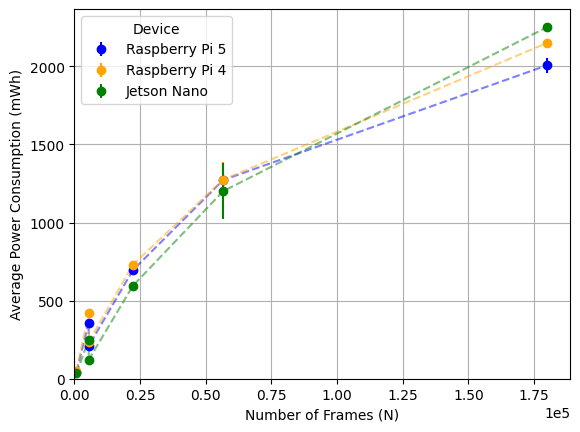

In [35]:
# Plot an errorbar for the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns for each dataset with the standard deviation as the error and Raw Frame Count as the x-axis.
import matplotlib.pyplot as plt
import numpy as np

processing_time_summary_sorted = processing_time_summary.sort_values(by='Raw Video Frame Count', ascending=True)

# Set the seaborn style to vo_8_colorblind
plt.style.use('seaborn-v0_8-colorblind') 

# print(plt.style.available)

# Set the figure size.
plt.figure(figsize=(10, 6))

# Set the x-axis to be the Raw Frame Count column.
x = processing_time_summary_sorted['Raw Video Frame Count']

# Set the y-axis to be the Processing Time RPi5 (s) column.
y = processing_time_summary_sorted['Average_power_mWh_RPi5']

# Set the error to be the Processing Time RPi5 - SD (s) column.
error = processing_time_summary_sorted['SD_power_mWh_RPi5']

fig, ax = plt.subplots()

# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="RPi5", color='blue')
ax.plot(x, y, linestyle='--', alpha=0.5, color='blue')



# Set the y-axis to be the Processing Time RPi4 (s) column.
y = processing_time_summary_sorted['Average_power_mWh_RPi4']

# Set the error to be the Processing Time RPi4 - SD (s) column.

error = processing_time_summary_sorted['SD_power_mWh_RPi4']


# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="RPi4", color='orange')
ax.plot(x, y, linestyle='--', alpha=0.5, color='orange')

# Set the y-axis to be the Processing Time JetsonNano (s) column.
y = processing_time_summary_sorted['Average_power_mWh_JetsonNano']

# Set the error to be the Processing Time JetsonNano - SD (s) column.

error = processing_time_summary_sorted['SD_power_mWh_JetsonNano']


# Plot the errorbar.
ax.errorbar(x, y, yerr=error, fmt='o', label="JetsonNano", color='green')
ax.plot(x, y, linestyle='--', alpha=0.5, color='green')


# Set the x-axis label.
plt.xlabel("Number of Frames (N)")

# Set the y-axis label.

plt.ylabel("Average Power Consumption (mWh)")

# Set the title of the plot.
# plt.title("Processing Time vs Raw Frame Count")

# Insert Gridlines.
plt.grid()


# Set the legend. and edit labels to Raspberrry Pi 5 and Raspberry Pi 4.
plt.legend(loc="upper left", title="Device")
plt.gca().get_legend().get_texts()[0].set_text('Raspberry Pi 5')
plt.gca().get_legend().get_texts()[1].set_text('Raspberry Pi 4')
plt.gca().get_legend().get_texts()[2].set_text('Jetson Nano')

# Stary the y-axis and x axis from 0.
plt.ylim(0)
plt.xlim(0)

# Chamge the x axis labels to scientific notation.
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xticks(np.arange(0, max(x)+1, 1000))






# Save the plot as a png file.
# plt.savefig("./testing/power_consumption.png", dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()








In [88]:
energy_summary_temp = energy_data_summary

energy_summary_temp = energy_summary_temp.drop(columns=['Repetition_RPi4', 'Repetition_RPi5'])

# Create a new dataframe energy_summary that groups the energy consumption data by dataset. Calculate the average and standard deviation of Power_consumption_mWh for each dataset.
energy_summary = energy_summary_temp.groupby(['Dataset']).mean()

# # Create a new datset energy_summary that groups the energy consumption data by dataset and device. Remove the Repetition column, calculate the average and standard deviation of Power_consumption_mWh for each dataset.
# energy_summary = energy_summary_temp.groupby(['Dataset', 'Device']).mean()

# # Reset the index of the dataframe.
# energy_summary = energy_summary.reset_index()

# # Rename the columns to make them more readable.

# energy_summary = energy_summary.rename(columns={
#     "Power_consumption_mWh": "Average Power Consumption (mWh)",
#     "Power_consumption_Wh": "Average Power Consumption (Wh)",
#     "Average_power": "Average Power Consumption (W)"
# })

# # Calculate the standard deviation of the power consumption for each dataset.

# energy_summary['Power Consumption SD (mWh)'] = energy_data_summary.groupby(['Dataset', 'Device'])['Power_consumption_mWh'].std().values

# # Round the values in the dataframe to 2 decimal places.
# energy_summary = energy_summary.round(2)

# # Move the Average Power Consumption (mWh) column after the Average Power Consumption (Wh) column.
# energy_summary = energy_summary[['Dataset', 'Device', 'Time',  'Power Consumption SD (mWh)', 'Average Power Consumption (mWh)']]

energy_summary


,Time_RPi4,Average_power_RPi4,Power_consumption_Wh_RPi4,Power_consumption_mWh_RPi4,Time_RPi5,Average_power_RPi5,Power_consumption_Wh_RPi5,Power_consumption_mWh_RPi5
Dataset,,,,,,,,
Naqvi2022,499.333333,3.042636,0.421984,421.983616,275.666667,4.701060,0.359975,359.974957
NestMonitoring,1666.000000,2.754114,1.274264,1274.263564,1093.000000,4.191186,1.272325,1272.325143
PICT,281.000000,3.012809,0.235166,235.166489,176.333333,4.305112,0.210880,210.880175
Ratnayake2021,946.666667,2.776636,0.730089,730.088715,577.000000,4.336244,0.694881,694.881340
Ratnayake2022,2930.000000,2.641667,2.149609,2149.609233,1903.333333,3.795886,2.006492,2006.491913
vanderVoort2022,61.000000,2.891884,0.049001,49.001363,36.000000,4.289082,0.042891,42.890820


In [81]:
# In the energy_summary dataframe, add seperate columns to show Power Consumption SD (mWh) - RPi5, Power Consumption SD (mWh) - RPi5, Average Power Consumption (mWh) - RPi4 and Average Power Consumption (mWh) - RPi4.
energy_summary['Power Consumption SD (mWh) - RPi5'] = energy_summary['Power Consumption SD (mWh)']
energy_summary['Power Consumption SD (mWh) - RPi4'] = energy_summary['Power Consumption SD (mWh)']
energy_summary['Average Power Consumption (mWh) - RPi5'] = energy_summary['Average Power Consumption (mWh)']
energy_summary['Average Power Consumption (mWh) - RPi4'] = energy_summary['Average Power Consumption (mWh)']

# Set the Power Consumption SD (mWh) - RPi4 and Average Power Consumption (mWh) - RPi4 columns to NaN.
energy_summary['Power Consumption SD (mWh) - RPi4'] = np.nan
energy_summary['Average Power Consumption (mWh) - RPi4'] = np.nan

# Set the Power Consumption SD (mWh) - RPi5 and Average Power Consumption (mWh) - RPi5 columns to NaN for the RPi4 rows.
energy_summary.loc[energy_summary['Device'] == 'RPi4', 'Power Consumption SD (mWh) - RPi5'] = np.nan
energy_summary.loc[energy_summary['Device'] == 'RPi4', 'Average Power Consumption (mWh) - RPi5'] = np.nan

# Set the Power Consumption SD (mWh) - RPi4 and Average Power Consumption (mWh) - RPi4 columns to NaN for the RPi5 rows.
energy_summary.loc[energy_summary['Device'] == 'RPi5', 'Power Consumption SD (mWh) - RPi4'] = np.nan
energy_summary.loc[energy_summary['Device'] == 'RPi5', 'Average Power Consumption (mWh) - RPi4'] = np.nan

# Rename the columns to make them more readable.

energy_summary = energy_summary.rename(columns={
    "Power Consumption SD (mWh) - RPi5": "Power Consumption SD (mWh) - RPi5",
    "Power Consumption SD (mWh) - RPi4": "Power Consumption SD (mWh) - RPi4",
    "Average Power Consumption (mWh) - RPi5": "Average Power Consumption (mWh) - RPi5",
    "Average Power Consumption (mWh) - RPi4": "Average Power Consumption (mWh) - RPi4"
})

# Round the values in the dataframe to 2 decimal places.
energy_summary = energy_summary.round(2)

energy_summary

,Dataset,Device,Time,Power Consumption SD (mWh),Average Power Consumption (mWh),Power Consumption SD (mWh) - RPi5,Power Consumption SD (mWh) - RPi4,Average Power Consumption (mWh) - RPi5,Average Power Consumption (mWh) - RPi4
0,Naqvi2022,RPi4,499.33,7.58,421.98,NaN,NaN,NaN,NaN
1,Naqvi2022,RPi5,275.67,5.27,359.97,5.27,NaN,359.97,NaN
2,NestMonitoring,RPi4,1666.00,114.54,1274.26,NaN,NaN,NaN,NaN
3,NestMonitoring,RPi5,1093.00,17.86,1272.33,17.86,NaN,1272.33,NaN
4,PICT,RPi4,281.00,4.56,235.17,NaN,NaN,NaN,NaN
5,PICT,RPi5,176.33,7.91,210.88,7.91,NaN,210.88,NaN
6,Ratnayake2021,RPi4,946.67,11.27,730.09,NaN,NaN,NaN,NaN
7,Ratnayake2021,RPi5,577.00,20.46,694.88,20.46,NaN,694.88,NaN
8,Ratnayake2022,RPi4,2930.00,26.60,2149.61,NaN,NaN,NaN,NaN
9,Ratnayake2022,RPi5,1903.33,46.30,2006.49,46.30,NaN,2006.49,NaN


In [70]:
# Add the frame count data from video_data_summary to the energy_data_summary dataframe in a new column called "Frame Count".
energy_data_summary = energy_data_summary.merge(video_data_summary[['Dataset', 'Frame Count']], on='Dataset', how='left')

energy_data_summary

,Device,Dataset,Repetition,Time,Average_power,Power_consumption_Wh,Power_consumption_mWh,Frame Count
0,RPi4,vanderVoort2022,Rep1,61,2.895380,0.049061,49.060599,790
1,RPi4,vanderVoort2022,Rep2,61,2.909209,0.049295,49.294930,790
2,RPi4,vanderVoort2022,Rep3,61,2.871063,0.048649,48.648562,790
3,RPi5,vanderVoort2022,Rep1,36,4.341530,0.043415,43.415296,790
4,RPi5,vanderVoort2022,Rep2,36,4.270385,0.042704,42.703849,790
5,RPi5,vanderVoort2022,Rep3,36,4.255331,0.042553,42.553313,790
6,RPi4,Naqvi2022,Rep1,496,3.119690,0.429824,429.823963,5445
7,RPi4,Naqvi2022,Rep2,500,3.034396,0.421444,421.443834,5445
8,RPi4,Naqvi2022,Rep3,502,2.973823,0.414683,414.683051,5445
9,RPi5,NestMonitoring,Rep1,1107,4.126077,1.268769,1268.768820,56664


In [ ]:
# Get numpy version
import numpy as np
np.__version__

# Get pandas version
import pandas as pd
pd.__version__

# Get opnecv version
import cv2
cv2.__version__

# Get python version
import sys
sys.version

# Get ffmpeg version
import subprocess
cmd = "ffmpeg -version"
returned_output = subprocess.check_output(cmd)
print(returned_output.decode("utf-8"))
